In [1]:
import numpy as np
import pandas as pd
from scipy.stats import iqr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline




from pylab import *
from pandas.tools.plotting import scatter_matrix


In [2]:
font = {'family': 'serif', 'color':  'darkred', 'weight': 'normal','size': 14}
font1 = {'family': 'serif', 'color':  'darkred', 'weight': 'normal','size': 10}
font2 = {'family': 'serif', 'color':  'darkred', 'weight': 'normal','size': 16}

## Чтение и переименование данных 

In [3]:
df = pd.read_excel('tsk2.xlsx')
df.head()

,year,square,spending,num of workers,hoofed animals,fur animals,birds,farms
0,1996,50583.5,12784.9,4558,219.4,2528.9,10888.8,17
1,1997,48701.6,15268.7,5048,205.3,2554.0,9975.4,28
2,1998,47721.8,16388.2,5262,192.3,2464.2,9828.0,26
3,1999,47903.9,20336.3,4906,182.6,2422.3,8953.9,29
4,2000,47806.9,20811.1,4965,177.8,2416.4,9417.5,44


##### Не забываем, что в таблице данные заданы через тысячи миллиона и так далее. 

In [4]:
df.loc[:,'square'] *= 1000 **(-1)
df.loc[:,'spending'] *= 1000 **(-1)
df.loc[:,'hoofed animals'] *= 1000 
df.loc[:,'fur animals'] *= 1000
df.loc[:,'birds'] *= 1000 

In [5]:
df = df.rename(columns={'square': 'Area_mln_hectares', 'spending': 'Spending_mln_hrn', 'num of workers': 'Num_of_workers', 'hoofed animals': 'Hoofed_animals', 'fur animals': 'Hur_animals', 'birds': 'Birds','farms': 'Animal_nurseries'})
df.head()

,year,Area_mln_hectares,Spending_mln_hrn,Num_of_workers,Hoofed_animals,Hur_animals,Birds,Animal_nurseries
0,1996,50.5835,12.7849,4558,219400.0,2528900.0,10888800.0,17
1,1997,48.7016,15.2687,5048,205300.0,2554000.0,9975400.0,28
2,1998,47.7218,16.3882,5262,192300.0,2464200.0,9828000.0,26
3,1999,47.9039,20.3363,4906,182600.0,2422300.0,8953900.0,29
4,2000,47.8069,20.8111,4965,177800.0,2416400.0,9417500.0,44


In [6]:
df1 = df
df_stat = df1.drop(['year'],axis=1)
df_stat.head(2)

,Area_mln_hectares,Spending_mln_hrn,Num_of_workers,Hoofed_animals,Hur_animals,Birds,Animal_nurseries
0,50.5835,12.7849,4558,219400.0,2528900.0,10888800.0,17
1,48.7016,15.2687,5048,205300.0,2554000.0,9975400.0,28


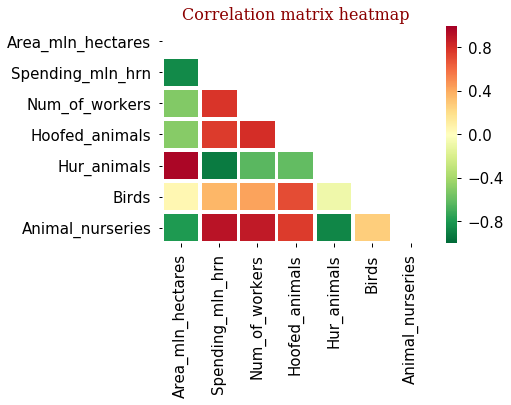

In [7]:
#Correlation heatmap
sns.set_context("notebook",font_scale = 1.5, rc={"lines.linewidth": 2.5}) 

corr = df_stat.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#seaborn.heatmap(corr, cmap = 'inferno', vmax = 1., vmin = -1., mask = mask, linewidth = 2.5)
plt.title('Correlation matrix heatmap',fontdict = font2)
sns.heatmap(corr, cmap = 'RdYlGn_r', vmax = 1., vmin = -1., mask = mask, linewidth = 2.5);


#plt.savefig('Correlation_matrix_heatmap.png', format='png', dpi=300)

In [8]:
# Вычисление среднего
mean = np.mean(df_stat, axis=0)
df_mean = pd.DataFrame(mean)
df_mean.columns = ['Mean']
df_mean

,Mean
Area_mln_hectares,4.554428e+01
Spending_mln_hrn,1.202456e+02
Num_of_workers,5.984818e+03
Hoofed_animals,2.102091e+05
Hur_animals,2.212559e+06
Birds,9.811314e+06
Animal_nurseries,1.337727e+02


In [9]:
#Медиана
df_median =  pd.DataFrame(df_stat.median(axis=0))
df_median.columns = ['Median']
df_median.head()

,Median
Area_mln_hectares,4.722615e+01
Spending_mln_hrn,8.174905e+01
Num_of_workers,5.973500e+03
Hoofed_animals,2.130500e+05
Hur_animals,2.284350e+06


In [10]:
#Дисперссия
var = np.var(df_stat, axis = 0)
df_var = pd.DataFrame({"Variance": var})
df_var.head()

,Variance
Area_mln_hectares,1.357150e+01
Spending_mln_hrn,1.053927e+04
Num_of_workers,6.174582e+05
Hoofed_animals,5.102508e+08
Hur_animals,7.424128e+10


In [11]:
#Интерквартильный размах
index1 = df_var.index.tolist()
print(index1)
df_iqr = pd.DataFrame(iqr(df_stat, axis=0),index = index1)
df_iqr.columns = ['IQR']
df_iqr.head()

['Area_mln_hectares', 'Spending_mln_hrn', 'Num_of_workers', 'Hoofed_animals', 'Hur_animals', 'Birds', 'Animal_nurseries']


,IQR
Area_mln_hectares,2.6702
Spending_mln_hrn,186.0390
Num_of_workers,1102.2500
Hoofed_animals,43200.0000
Hur_animals,314900.0000


In [12]:
Result_statistic = pd.concat([df_mean,df_median,df_var,df_iqr],axis = 1)
Result_statistic.head(20)

,Mean,Median,Variance,IQR
Area_mln_hectares,4.554428e+01,4.722615e+01,1.357150e+01,2.6702
Spending_mln_hrn,1.202456e+02,8.174905e+01,1.053927e+04,186.0390
Num_of_workers,5.984818e+03,5.973500e+03,6.174582e+05,1102.2500
Hoofed_animals,2.102091e+05,2.130500e+05,5.102508e+08,43200.0000
Hur_animals,2.212559e+06,2.284350e+06,7.424128e+10,314900.0000
Birds,9.811314e+06,9.792100e+06,2.826696e+11,686275.0000
Animal_nurseries,1.337727e+02,1.390000e+02,5.792085e+03,133.5000


In [13]:
#Корреляция Пирсона
corr = df_stat.corr()
corr

,Area_mln_hectares,Spending_mln_hrn,Num_of_workers,Hoofed_animals,Hur_animals,Birds,Animal_nurseries
Area_mln_hectares,1.000000,-0.853679,-0.510364,-0.498136,0.972034,0.048485,-0.783467
Spending_mln_hrn,-0.853679,1.000000,0.785662,0.763282,-0.919471,0.361212,0.918721
Num_of_workers,-0.510364,0.785662,1.000000,0.804859,-0.629380,0.435128,0.889425
Hoofed_animals,-0.498136,0.763282,0.804859,1.000000,-0.607175,0.708028,0.763938
Hur_animals,0.972034,-0.919471,-0.629380,-0.607175,1.000000,-0.085774,-0.872199
Birds,0.048485,0.361212,0.435128,0.708028,-0.085774,1.000000,0.266335
Animal_nurseries,-0.783467,0.918721,0.889425,0.763938,-0.872199,0.266335,1.000000


In [14]:
#Корреляция Спирмена
corrspear = spearmanr(df_stat)
cspfr = pd.DataFrame(corrspear[0], index=index1, columns=index1)
cspfr

,Area_mln_hectares,Spending_mln_hrn,Num_of_workers,Hoofed_animals,Hur_animals,Birds,Animal_nurseries
Area_mln_hectares,1.000000,-0.964992,-0.838509,-0.712027,0.954828,-0.221909,-0.963862
Spending_mln_hrn,-0.964992,1.000000,0.869001,0.719932,-0.969509,0.300960,0.981931
Num_of_workers,-0.838509,0.869001,1.000000,0.836251,-0.809147,0.503106,0.858837
Hoofed_animals,-0.712027,0.719932,0.836251,1.000000,-0.692829,0.705251,0.722191
Hur_animals,0.954828,-0.969509,-0.809147,-0.692829,1.000000,-0.229814,-0.952569
Birds,-0.221909,0.300960,0.503106,0.705251,-0.229814,1.000000,0.262564
Animal_nurseries,-0.963862,0.981931,0.858837,0.722191,-0.952569,0.262564,1.000000


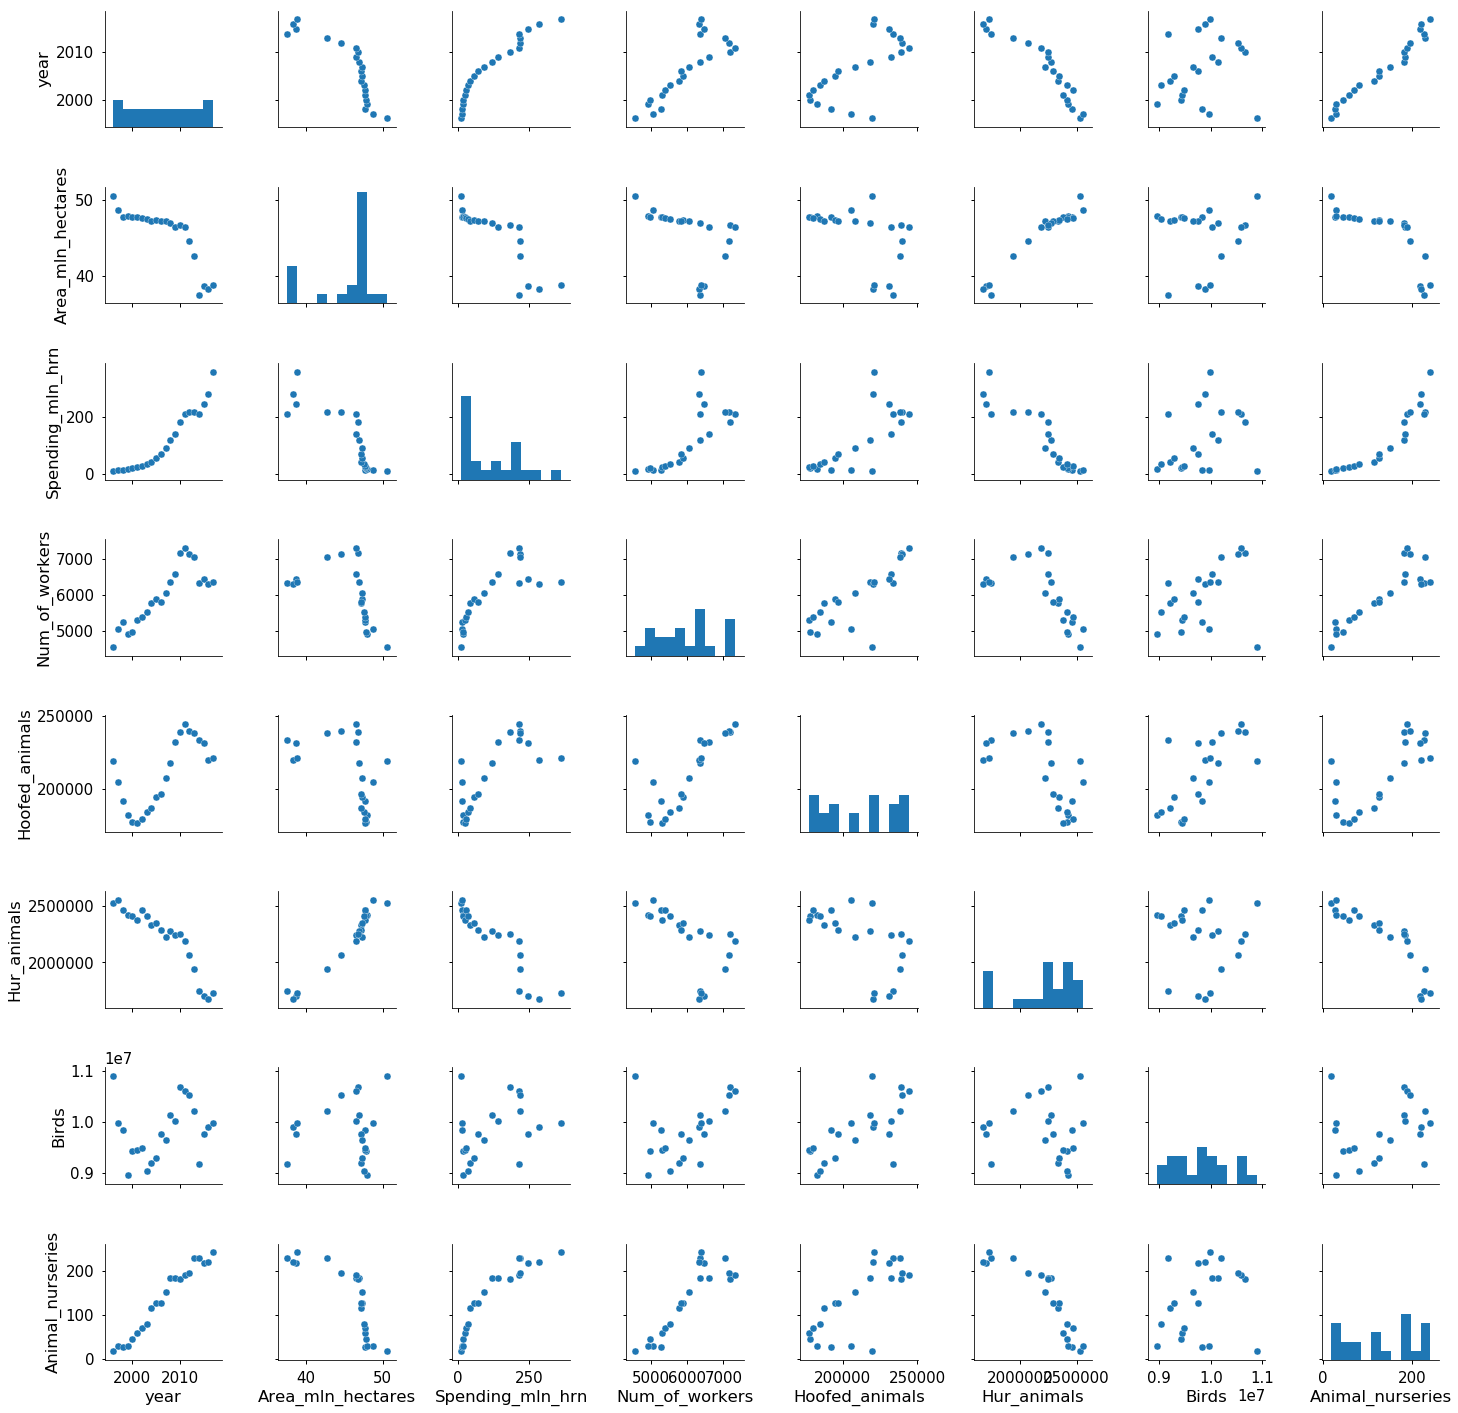

In [15]:
#Диаграмма рассеяния
scatplot = sns.pairplot(df)
#plt.show(scatplot)
plt.savefig('scatter.png', format='png', dpi=300)

In [16]:
df.head(1)
#list(df.columns.values)

,year,Area_mln_hectares,Spending_mln_hrn,Num_of_workers,Hoofed_animals,Hur_animals,Birds,Animal_nurseries
0,1996,50.5835,12.7849,4558,219400.0,2528900.0,10888800.0,17


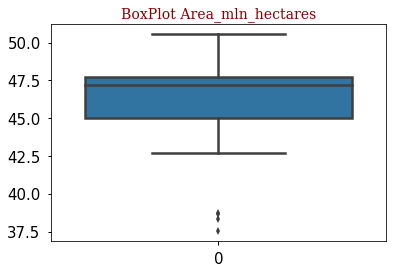

In [17]:
#Ящик с усами
whiskplot = sns.boxplot(data = df["Area_mln_hectares"], orient="v")
plt.title('BoxPlot Area_mln_hectares',fontdict=font);
plt.savefig('Area_mln_hectares.png', format='png', dpi=300)

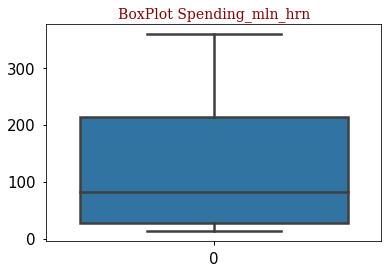

In [18]:
whiskplot = sns.boxplot(data = df["Spending_mln_hrn"], orient="v")
plt.title('BoxPlot Spending_mln_hrn',fontdict=font);
plt.savefig('Spending_mln_hrn.png', format='png', dpi=300)

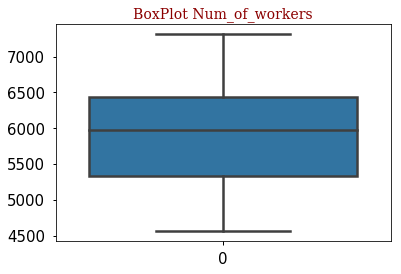

In [19]:
whiskplot = sns.boxplot(data = df["Num_of_workers"], orient="v")
plt.title('BoxPlot Num_of_workers',fontdict=font);
plt.savefig('BoxPlot Num_of_workers.png', format='png', dpi=300)

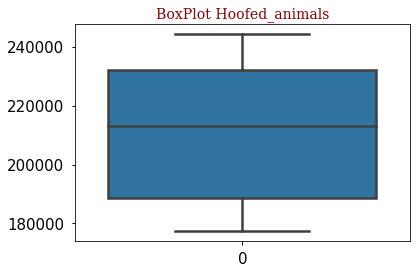

In [20]:
whiskplot = sns.boxplot(data = df["Hoofed_animals"], orient="v")
plt.title('BoxPlot Hoofed_animals',fontdict=font);
plt.savefig('Hoofed_animals.png', format='png', dpi=300)

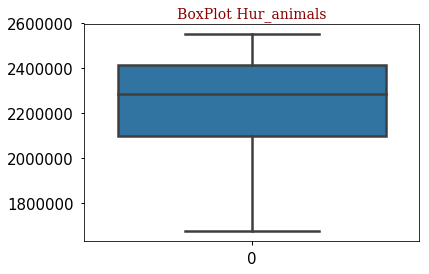

In [21]:
whiskplot = sns.boxplot(data = df["Hur_animals"], orient="v")
plt.title('BoxPlot Hur_animals',fontdict=font);
plt.savefig('Hur_animals.png', format='png', dpi=300)

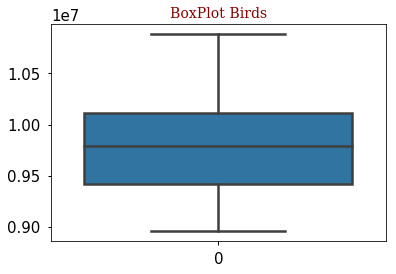

In [22]:
whiskplot = sns.boxplot(data = df["Birds"], orient="v")
plt.title('BoxPlot Birds',fontdict=font);
plt.savefig('Birds.png', format='png', dpi=300)

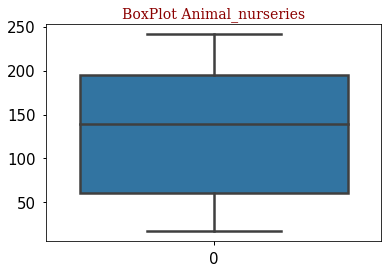

In [23]:
whiskplot = sns.boxplot(data = df["Animal_nurseries"], orient="v")
plt.title('BoxPlot Animal_nurseries',fontdict=font);
plt.savefig('Animal_nurseries.png', format='png', dpi=300)

#### Нормализируем данные для построения Box plot на одном

In [24]:
scaler = StandardScaler()
df1 = df.drop('year', axis=1)
df1.head(2)
df_scaled = scaler.fit_transform(df1.values)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()
df_scaled.columns = ["Area", "Spending", "Num_of_workers", "Hoofed_animals", "Hur_animals", "Birds", "Animal_nurseries"]
df_scaled

,Area,Spending,Num_of_workers,Hoofed_animals,Hur_animals,Birds,Animal_nurseries
0,1.367884,-1.046754,-1.815787,0.406880,1.161001,2.026620,-1.534348
1,0.857047,-1.022559,-1.192207,-0.217325,1.253120,0.308626,-1.389813
2,0.591082,-1.011654,-0.919867,-0.792833,0.923546,0.031385,-1.416092
3,0.640513,-0.973197,-1.372918,-1.222251,0.769769,-1.612690,-1.376673
4,0.614182,-0.968572,-1.297833,-1.434746,0.748115,-0.740715,-1.179579
5,0.591028,-0.913832,-0.852419,-1.456881,0.611955,-0.704602,-0.995624
6,0.583835,-0.873441,-0.759518,-1.350633,0.931987,-0.613380,-0.837949
7,0.536141,-0.831145,-0.578807,-1.124857,0.731967,-1.454884,-0.706553
8,0.452210,-0.737571,-0.277198,-1.000901,0.449370,-1.146608,-0.246666
9,0.487823,-0.605557,-0.124485,-0.673304,0.498549,-0.997643,-0.088991


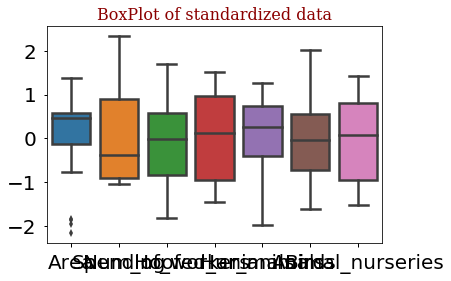

In [25]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5,'figure.figsize':(25,10)})
ax = sns.boxplot(data=df_scaled)
plt.title('BoxPlot of standardized data',fontdict=font2);
plt.savefig('BoxPlot_general.png', format='png', dpi=300)

# Построение линейных моделей учитывая мультиколинеарность

## Построение модели для hoofed_animals

In [26]:
import statsmodels.formula.api as sm1
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [27]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [28]:
df.head(2)

,year,Area_mln_hectares,Spending_mln_hrn,Num_of_workers,Hoofed_animals,Hur_animals,Birds,Animal_nurseries
0,1996,50.5835,12.7849,4558,219400.0,2528900.0,10888800.0,17
1,1997,48.7016,15.2687,5048,205300.0,2554000.0,9975400.0,28


In [29]:
# vif чем больше тем лучше
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor((df.iloc[:, [1, 2, 3, 7]]).values, i) for i in range(4)]
vif['features'] = df.iloc[:,[1, 2, 3, 7]].columns
vif

,VIF Factor,features
0,274.345599,Area_mln_hectares
1,16.846392,Spending_mln_hrn
2,516.631878,Num_of_workers
3,66.350455,Animal_nurseries


In [30]:
result_Hoofed_animals= stepwise_selection(df.iloc[:, [1, 2, 3, 7]], df.iloc[:, 4])
# [:, [1, 2, 3, 7]], Это уровни от которых зависит переменная, и на которые мы можем влиять. 
# df.iloc[:, 4]) #Последнее число это номер столбца переменной которую мы предиктим. 
result_Hoofed_animals

Add  Num_of_workers                 with p-value 6.28073e-06


c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


['Num_of_workers']

In [31]:
model = sm1.ols(formula = "Hoofed_animals ~ Num_of_workers", data = df)
fitted = model.fit(alpha = 0.05)
fitted.summary(alpha = 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Hoofed_animals   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     36.79
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           6.28e-06
Time:                        16:35:21   Log-Likelihood:                -240.29
No. Observations:                  22   AIC:                             484.6
Df Residuals:                      20   BIC:                             486.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.174e+04    2.3e+04      3.115      0.005    2.37e+04     1.2e+05
Num_of_workers    23.1370      3.815      6.065      0.000      15.180      31.095
==============================================================================
Omnibus:                       11.066   Durbin-Watson:                   0.382
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.390
Skew:                           1.178   Prob(JB):                      0.00914
Kurtosis:                       5.167   Cond. No.                     4.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

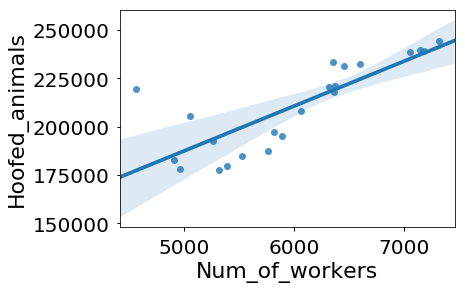

In [32]:
#Єто просто тест
sns.regplot(x="Num_of_workers", y = "Hoofed_animals", data=df);

In [33]:
font3 = {'family': 'serif', 'color':  'black', 'weight': 'normal','size': 26}

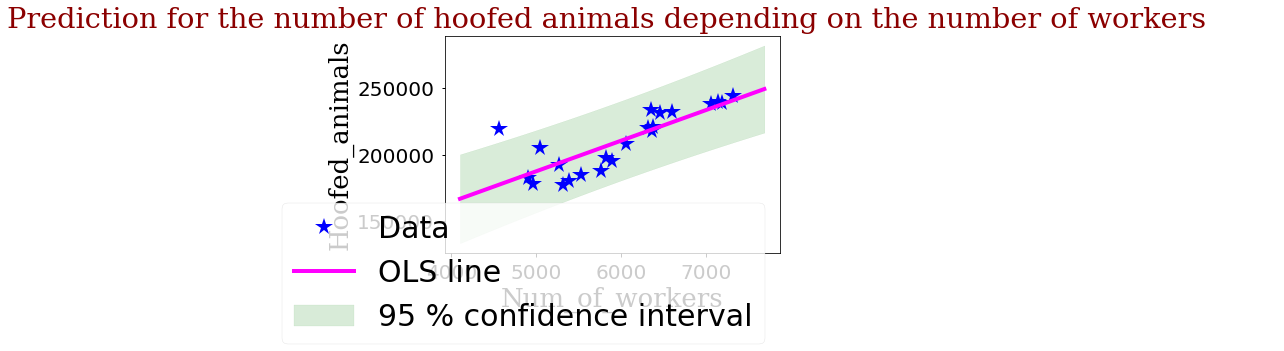

In [34]:
plt.subplots()
plt.suptitle('Prediction for the number of hoofed animals depending on the number of workers', fontdict = font)

plt.xlabel('Num_of_workers', fontdict = font3)
plt.ylabel('Hoofed_animals', fontdict = font3)

x_pred = np.linspace(df['Num_of_workers'].min()*0.9, df['Num_of_workers'].max()*1.05, 70)

x_pred2 = sm.add_constant(x_pred)

from statsmodels.sandbox.regression.predstd import wls_prediction_std

sdev, lower, upper = wls_prediction_std(fitted, exog=x_pred2, alpha=0.05) # получение доверительного интервала

plt.fill_between(x_pred, lower, upper, color='green', alpha=0.15, label = '95 % confidence interval')#color='#000000'

#plt.plot(df['Num_of_workers'], df['Hoofed_animals'], '*', s=10 )

plt.plot(df['Num_of_workers'], df['Hoofed_animals'],'*',markersize = 18, color='blue', label = 'Data')

y_pred = (fitted.params[1] * x_pred + fitted.params[0])


plt.plot(x_pred, y_pred, '-', color='magenta', linewidth = 4, label = 'OLS line');

plt.legend(prop={'size': 30}, bbox_to_anchor=(1, 0.3));

plt.savefig('Prediction_hoofed_animals.png', format='png', dpi=300)

####  Проверка модели на нормальность остатков и гетероскедастичность

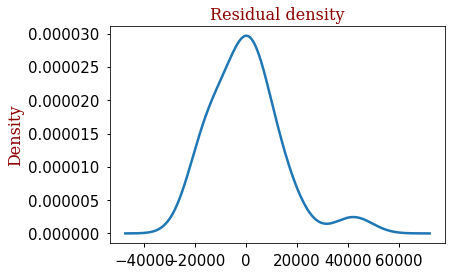

In [35]:
sns.set_context("notebook",font_scale = 1.5, rc={"lines.linewidth": 2.5}) 

fitted.resid.plot.density();
plt.title('Residual density',fontdict = font2)
xlabel('', fontdict=font, labelpad=None)
ylabel('Density', fontdict=font2, labelpad=None);
plt.savefig('resid.plot.density.png', format='png', dpi=300)

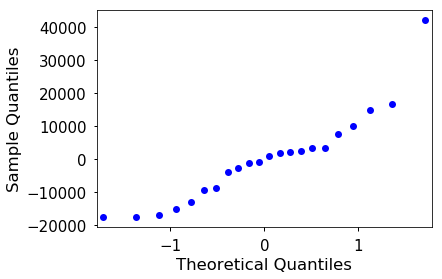

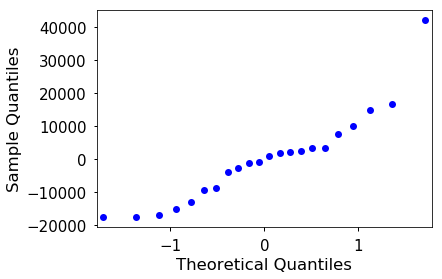

In [36]:
sm.qqplot(fitted.resid)

In [37]:
#Теперь проверим однородность дисперсий или Homoscedasticity
from statsmodels.stats import diagnostic as dia
het = dia.het_breushpagan(fitted.resid, fitted.model.exog)
print ('p-value: ', het[-1])
het

p-value:  0.01462074843946109


c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


(5.790163020134893,
 0.01611609463961676,
 7.144011413966826,
 0.01462074843946109)

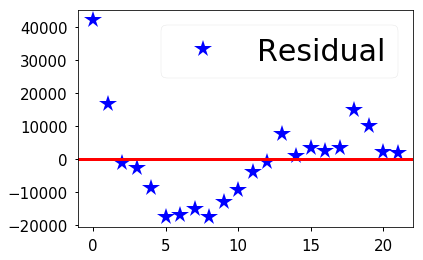

In [38]:
plt.plot(fitted.resid,'*',markersize = 18, color='blue', label = 'Residual');
plt.legend(prop={'size': 30}, bbox_to_anchor=(1, 1));
axhline(linewidth=3, color='r');

#####   Видим что у нас есть гетероскедастичность( ) Полученые оценки из ОЛС не очень эфективны

In [39]:
X = df[['Num_of_workers']]

In [40]:
y = df[['Hoofed_animals']]
w =np.ones(len(y))
print(w)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [41]:
mod_wls = sm.WLS(y, X, weights=1./w)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:         Hoofed_animals   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3496.
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           7.69e-25
Time:                        16:35:28   Log-Likelihood:                -244.64
No. Observations:                  22   AIC:                             491.3
Df Residuals:                      21   BIC:                             492.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Num_of_workers    34.9206      0.591     59.

In [42]:
print(res_wls.resid)

0     60231.957380
1     29020.868990
2      8547.863040
3     11279.592564
4      4419.277840
5     -8302.928154
6     -8452.131118
7     -8310.854692
8    -13787.034179
9    -10577.504805
10    -6067.984195
11    -3618.766625
12    -4029.863779
13     1724.115557
14   -11764.746392
15   -11183.787612
16    -9907.605204
17    -8064.752234
18    11784.421518
19     5817.759720
20     -533.040237
21    -1479.069665
dtype: float64


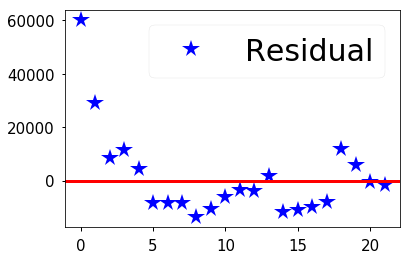

In [43]:
plt.plot(res_wls.resid,'*',markersize = 18, color='blue', label = 'Residual');
plt.legend(prop={'size': 30}, bbox_to_anchor=(1, 1));
axhline(linewidth=3, color='r');

In [44]:
#Теперь проверим однородность дисперсий или Homoscedasticity
from statsmodels.stats import diagnostic as dia
het = dia.het_breushpagan(res_wls.resid, res_wls.model.exog)
print ('p-value: ', het[-1])
het

p-value:  0.20051058205301356


c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


(1.6893592681495107, nan, 1.746697462651022, 0.20051058205301356)

# Построение модели для Hur_animals

In [45]:
result_Hur_animals= stepwise_selection(df.iloc[:, [1, 2, 3, 7]], df.iloc[:, 5])
# [:, [1, 2, 3, 7]], Это уровни от которых зависит переменная, и на которые мы можем влиять. 
# df.iloc[:, 4]) #Последнее число это номер столбца переменной которую мы предиктим. 
result_Hur_animals

Add  Area_mln_hectares              with p-value 4.70565e-14
Add  Animal_nurseries               with p-value 6.83264e-05


c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


['Area_mln_hectares', 'Animal_nurseries']

In [46]:
model = sm1.ols(formula = "Hur_animals ~  Area_mln_hectares + Animal_nurseries ", data = df)
fitted1 = model.fit(alpha = 0.05)
fitted1.summary(alpha = 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Hur_animals   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     395.6
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           3.28e-16
Time:                        16:35:32   Log-Likelihood:                -265.27
No. Observations:                  22   AIC:                             536.5
Df Residuals:                      19   BIC:                             539.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.684e+05   2.13e+05     -0.793      0.438   -6.13e+05    2.76e+05
Area_mln_hectares  5.529e+04   4181.297     13.224      0.000    4.65e+04     6.4e+04
Animal_nurseries  -1025.7405    202.399     -5.068      0.000   -1449.366    -602.115
==============================================================================
Omnibus:                        0.537   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.590
Skew:                           0.005   Prob(JB):                        0.745
Kurtosis:                       2.198   Cond. No.                     3.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Видим что модель зафитилась хорошо, но параметр Intercept нужно убрать

In [48]:
model = sm1.ols(formula = "Hur_animals ~  0 + Area_mln_hectares + Animal_nurseries ", data = df)
fitted1 = model.fit(alpha = 0.05)
fitted1.summary(alpha = 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Hur_animals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.762e+04
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           3.85e-35
Time:                        16:35:32   Log-Likelihood:                -265.63
No. Observations:                  22   AIC:                             535.3
Df Residuals:                      20   BIC:                             537.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Area_mln_hectares  5.199e+04    377.289    137.803      0.000    5.12e+04    5.28e+04
Animal_nurseries  -1158.7853    112.013    -10.345      0.000   -1392.440    -925.131
==============================================================================
Omnibus:                        1.999   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.084
Skew:                          -0.118   Prob(JB):                        0.581
Kurtosis:                       1.938   Cond. No.                         6.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Данная модель подогналась вообще идеально, и объясняет все 100 % данных

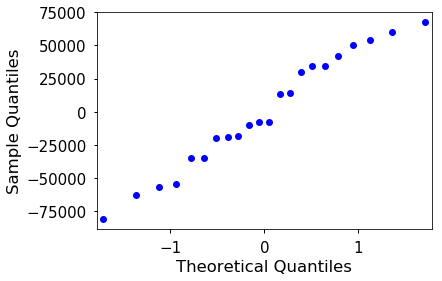

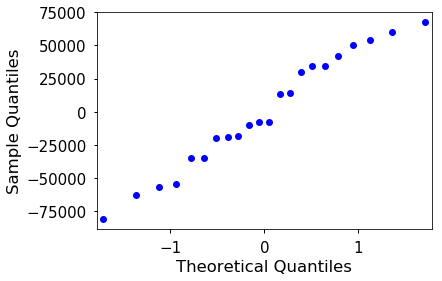

In [50]:
sm.qqplot(fitted1.resid)

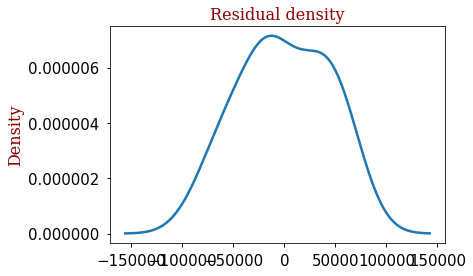

In [51]:
sns.set_context("notebook",font_scale = 1.5, rc={"lines.linewidth": 2.5}) 

fitted1.resid.plot.density();
plt.title('Residual density',fontdict = font2)
xlabel('', fontdict=font, labelpad=None)
ylabel('Density', fontdict=font2, labelpad=None);
plt.savefig('resid.plot.density.png', format='png', dpi=300)

In [52]:
#Теперь проверим однородность дисперсий или Homoscedasticity
from statsmodels.stats import diagnostic as dia
het = dia.het_breushpagan(fitted1.resid, fitted1.model.exog)
print ('p-value: ', het[-1])
het

p-value:  0.0007642937999317538


c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


(11.266318249578836,
 0.000789261113685461,
 10.496229077349692,
 0.0007642937999317538)

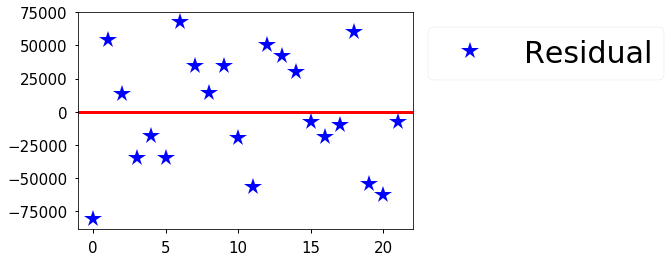

In [53]:
plt.plot(fitted1.resid,'*',markersize = 18, color='blue', label = 'Residual');
plt.legend(prop={'size': 30}, bbox_to_anchor=(1, 1));
axhline(linewidth=3, color='r');

# Построение модели для Birds

In [54]:
result_Hur_animals= stepwise_selection(df.iloc[:, [1, 2, 3, 7]], df.iloc[:, 6])
# [:, [1, 2, 3, 7]], Это уровни от которых зависит переменная, и на которые мы можем влиять. 
# df.iloc[:, 4]) #Последнее число это номер столбца переменной которую мы предиктим. 
result_Hur_animals

[]

In [55]:
### Оу, получаются птицы независимы.

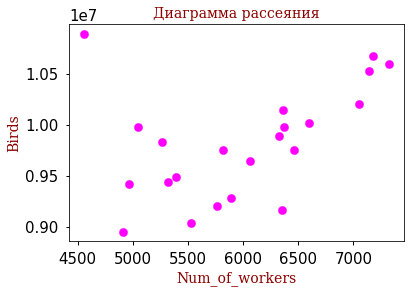

In [56]:
df.plot.scatter( 'Num_of_workers','Birds', color='Magenta', s=70)
plt.title('Диаграмма рассеяния',fontdict=font)
xlabel('Num_of_workers', fontdict=font, labelpad=None)
ylabel('Birds', fontdict=font, labelpad=None);
plt.savefig('scatter2.png', format='png', dpi=300)

In [57]:
model = sm1.ols(formula = "Birds ~ Num_of_workers ", data = df)
fitted1 = model.fit(alpha = 0.05)
fitted1.summary(alpha = 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Birds   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     4.671
Date:                Fri, 29 Jun 2018   Prob (F-statistic):             0.0430
Time:                        16:35:38   Log-Likelihood:                -318.95
No. Observations:                  22   AIC:                             641.9
Df Residuals:                      20   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.049e+06   8.22e+05      9.789      0.000    6.33e+06    9.76e+06
Num_of_workers   294.4101    136.220      2.161      0.043      10.260     578.560
==============================================================================
Omnibus:                        9.981   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.200
Skew:                           1.059   Prob(JB):                       0.0166
Kurtosis:                       5.112   Cond. No.                     4.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


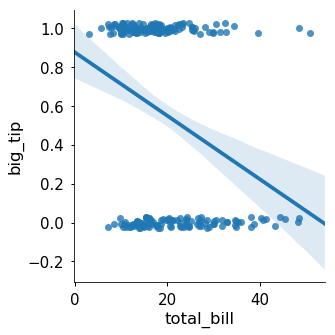

In [59]:
tips = sns.load_dataset("tips")
tips.head()
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

In [60]:
df.head(1)

,year,Area_mln_hectares,Spending_mln_hrn,Num_of_workers,Hoofed_animals,Hur_animals,Birds,Animal_nurseries
0,1996,50.5835,12.7849,4558,219400.0,2528900.0,10888800.0,17
